# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

# Reading Image

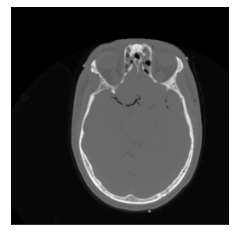

In [2]:
img = iio.imread('ct.jpg')[:,:,0]

def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        plt.savefig(name)
    plt.show()
    
show_image(img)

# Shifting 

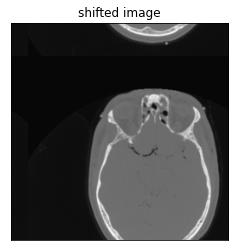

In [3]:
def trans_func(img, m, n):
    x, y = img.shape
    i = np.linspace(0,x,x) - x//2
    j = np.linspace(0,y,y) - y//2
    return np.outer(np.exp(-complex(0,1)*2*np.pi*i*m/x), np.exp(-complex(0,1)*2*np.pi*j*n/y))

def shift(img, m, n):
    f = np.fft.fftshift(np.fft.fft2(img))
    fnew = f*trans_func(img, m, n)
    new = np.fft.ifft2(np.fft.ifftshift(fnew)).real
    new = (new-np.min(new))/(np.max(new)-np.min(new))*255
    return new

show_image(shift(img, 40, 20), title='shifted image', save=True, name='res01.jpg')

# Fourier Transform of Kernel

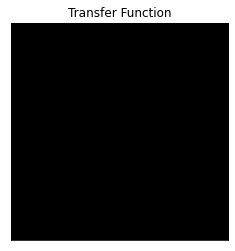

In [14]:
show_image(np.round(np.abs(trans_func(img, 40, 20))).astype('uint8'), title='Transfer Function', save=True, name='res02.jpg')